# **E-Commerce Sales Analysis Project**
---

## **Project Overview**
This project analyzes an **e-commerce sales dataset** to identify key business trends, top-selling products, and city-wise sales performance.  
**Dataset Size:** ~186,000 rows  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn  
**Objective:** Provide actionable insights to optimize **sales strategy, inventory, and marketing**.

---


## **Importing Necessary Libraries**

In [14]:

import pandas as pd
import numpy as np
import glob
import os


In [15]:
import os
os.getcwd()


'C:\\Users\\Lenovo\\data projects'

## **Merging the individual datasets into a single .csv file**

In [16]:

folder_path=r"C:\Users\Lenovo\OneDrive - SSN-Institute\Documents\Desktop\DATA ANALYSIS PROJECT\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"
all_months_list=glob.glob(os.path.join(folder_path,"*.csv"))#getting and listing file paths
df=pd.concat((pd.read_csv(f) for f in all_months_list),ignore_index=True)
df.to_csv("all_data.csv",index=False)
df.head()
                          



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [17]:
all_data=pd.read_csv("all_data.csv")#puts them in dataframe
all_data.describe()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


---

## **Step 1: Data Cleaning**
- **Removed repeated header rows** and invalid entries.  
- **Converted numeric columns** (`Quantity Ordered`, `Price Each`, `Order ID`) to appropriate types.  
- **Converted `Order Date`** to datetime format.  
- **Removed rows with missing values** (NaN).  

**Key Outcome:** Dataset is **clean and ready for analysis**.



In [18]:
all_data=all_data[all_data['Order Date']!='Order Date']#removes repeted header rows
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'],errors='coerce')
all_data['Price Each']=pd.to_numeric(all_data['Price Each'],errors='coerce')
pd.to_numeric(all_data['Order ID'],errors='coerce')
all_data['Order Date']=pd.to_datetime(all_data['Order Date'],errors='coerce')
all_data.dropna(inplace=True)
all_data.head()
all_data.describe()
all_data.info()
all_data.isna().sum()#all duplicates and nan are dropped


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18664\2354339570.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date']=pd.to_datetime(all_data['Order Date'],errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.9+ MB


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [19]:
pd.to_numeric(all_data['Order ID'],errors='coerce').isna().sum()#still we didnt convert order id to numeric..do it by deleting non numeric rows
all_data=all_data[pd.to_numeric(all_data['Order ID'],errors='coerce').notna()]
pd.to_numeric(all_data['Order ID'],errors='coerce').isna().sum()
all_data['Order ID'] = all_data['Order ID'].astype(int)#optional


In [20]:

all_data.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

---

## **Step 2: Feature Engineering**
- Added **`Sales = Quantity Ordered × Price Each`**  
- Extracted **time-based features**:  
  - `Month` (numerical)  
  - `Month Name`  
  - `Hour` and `Minute` of purchase  
- Extracted **location-based features**:  
  - `City` and `State` from `Purchase Address`  
  - `City/State Code` for location-wise analysis  




In [21]:
###add a column for month and additional columns.
#we need to multiply qty ordered and price each

all_data["Sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]
#all_data["Sales"]=pd.to_numeric(all_data["Sales"],errors="coerce")
all_data["Month"]=all_data["Order Date"].dt.month#month is the 0th and 1st index of order date
all_data["Month"]=all_data["Month"].astype('int32')
all_data['Month Name']=all_data['Order Date'].dt.month_name()
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data = all_data[
    [
        "Order ID", "Product", "Quantity Ordered", "Price Each", 
        "Order Date", "Purchase Address", "Sales", "Month Name", "Month", 
        "Hour", "Minute"
    ]
]


all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month Name,Month,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,4,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,4,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,4,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,4,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,4,9,27


In [22]:
#to get city name with state code
def get_city (address):
    return address.split(',')[1]
# to avoid cities in diff location but are same in name
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City/State Code']=all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} {get_state(x)}")
all_data.head()   



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month Name,Month,Hour,Minute,City/State Code
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,4,8,46,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,4,22,30,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,4,14,38,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,4,14,38,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,4,9,27,Los Angeles CA


In [23]:
results=all_data.groupby('Month Name')['Sales'].sum()
print(results)


Month Name
April        3390670.24
August       2244467.88
December     4613443.34
February     2202022.42
January      1822256.73
July         2647775.76
June         2577802.26
March        2807100.38
May          3152606.75
November     3199603.20
October      3736726.88
September    2097560.13
Name: Sales, dtype: float64


In [24]:
###from the above, december was the best month for sales

---

## **Step 3: Exploratory Data Analysis (EDA)**

### **3.1 Monthly Sales Analysis**
- Visualized **total sales by month** to identify peak sales periods.  
- **Observation:** Highest sales occur in **December**, lowest in **January**.
- **Reason for high sales in December:** Due to winter festivals such as **Christmas**,**Hanukkah**.


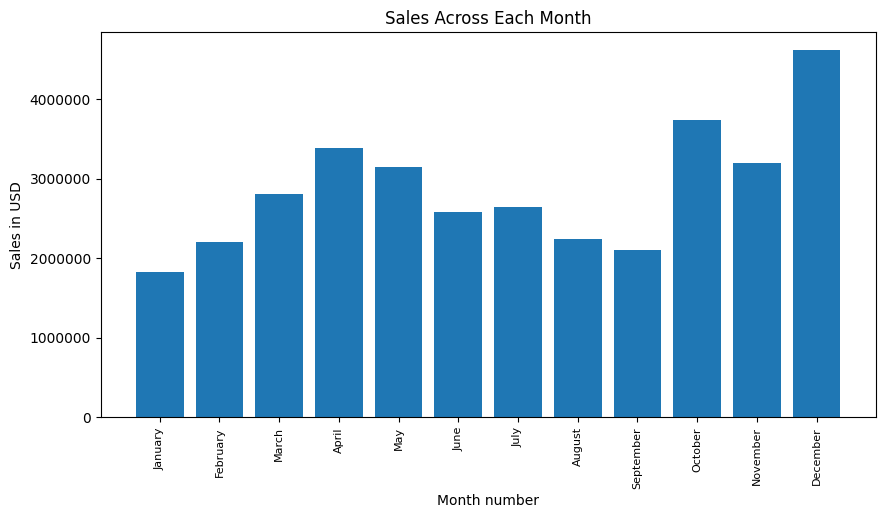

In [25]:
#visualize
import matplotlib.pyplot as plt

names=['January','February','March','April','May','June','July','August','September','October','November','December']

results=results.reindex(names)
plt.figure(figsize=(10,5))
plt.bar(results.index,results.values)
plt.xticks(results.index,rotation="vertical",size=8)
plt.title("Sales Across Each Month") 
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.ticklabel_format(style='plain', axis='y')#to remove exponential and avoid compression of y axis
plt.show()


---

### **3.2 City-Wise Sales Analysis**
- Total sales by city.  
- **Observation:** **San Francisco** and **Los Angeles** lead in revenue.
- **Reason for high sales:** **San Francisco** and **Los Angeles** are urban centres.

In [26]:
## find which city highest no of sales
citysales=all_data.groupby('City/State Code')['Sales'].sum()
print(citysales)

City/State Code
Atlanta GA          2795498.58
Austin TX           1819581.75
Boston MA           3661642.01
Dallas TX           2767975.40
Los Angeles CA      5452570.80
New York City NY    4664317.43
Portland ME          449758.27
Portland OR         1870732.34
San Francisco CA    8262203.91
Seattle WA          2747755.48
Name: Sales, dtype: float64


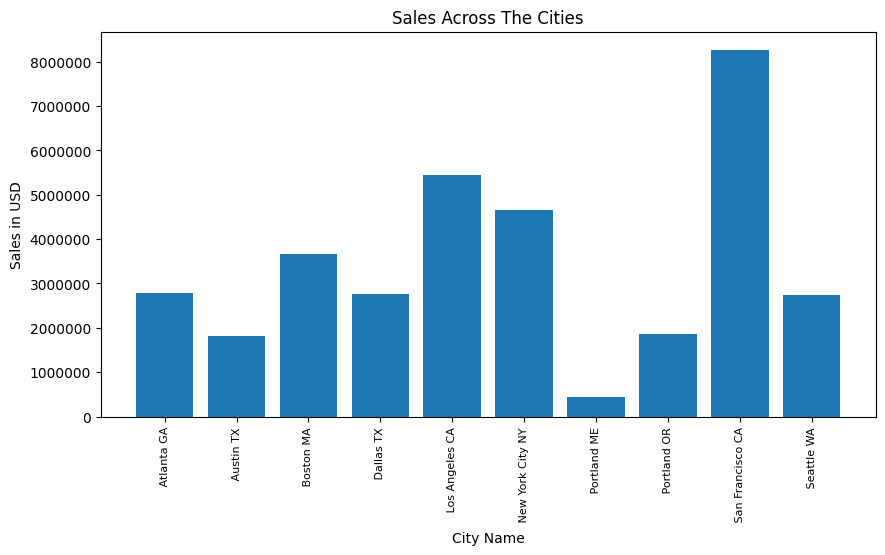

In [27]:
plt.figure(figsize=(10,5))
plt.bar(citysales.index,citysales.values)
plt.title("Sales Across The Cities")
plt.xticks(citysales.index,rotation='vertical',size=8)
plt.ylabel('Sales in USD')
plt.xlabel('City Name')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

---

### **3.3 Hourly Sales Analysis**
- Number of orders by hour of the day.  
- **Observation:** Most purchases happen between **7 PM and 11 PM** — optimal time for targeted ads.


In [28]:

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month Name,Month,Hour,Minute,City/State Code
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,4,8,46,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,4,22,30,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,4,14,38,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,4,14,38,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,4,9,27,Los Angeles CA


Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64


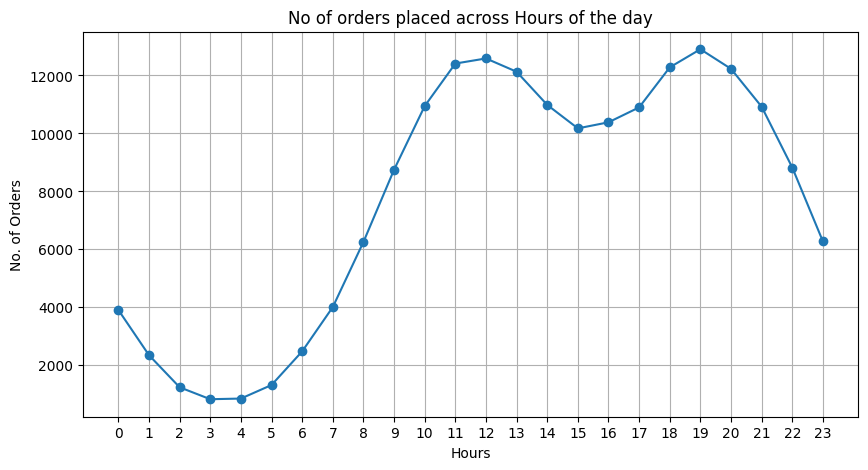

In [29]:

sales=all_data.groupby('Hour')['Order ID'].count()
print(sales)

plt.figure(figsize=(10,5))
plt.title("No of orders placed across Hours of the day")
plt.plot(sales.index,sales.values,marker='o')
plt.xticks(sales.index)
plt.xlabel('Hours')
plt.ylabel('No. of Orders')
plt.grid()
plt.show()



---

### 3.4 Hourly Revenue Analysis
-  Revenue earned across hour of the day.
- **Observation:** As most purchases happen between **7 PM and 11 PM** ,more revenue earned during those hours. 

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64


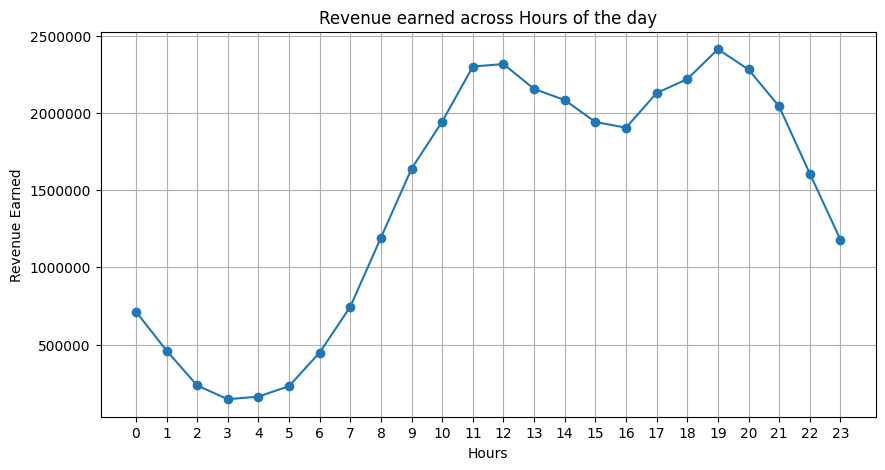

In [30]:
sales=all_data.groupby('Hour')['Sales'].sum()
print(sales)
##use linechart
plt.figure(figsize=(10,5))
plt.title("Revenue earned across Hours of the day")
plt.plot(sales.index,sales.values,marker='o')
plt.xticks(sales.index)
plt.xlabel('Hours')
plt.ylabel('Revenue Earned')
plt.grid()
plt.ticklabel_format(style='plain', axis='y')
plt.show()


---

### 3.5 Best-Selling Products
- Top products by quantity sold and revenue.
- **Observation:** Low-cost, high-demand items like **USB-C Cables** and **AAA Batteries** dominate sales.




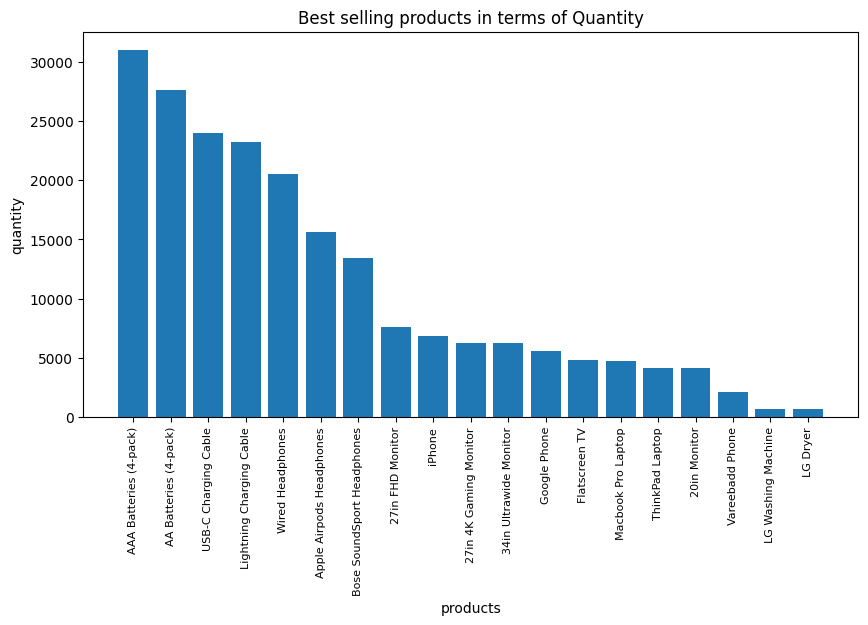

In [31]:
#what product sold the most?why?(we need the product and qty of them)
prod_grp=all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Best selling products in terms of Quantity")
plt.bar(prod_grp.index,prod_grp.values)
plt.xticks(prod_grp.index,rotation='vertical',size=8)
plt.xlabel('products')
plt.ylabel('quantity')
plt.show()


---

### 3.6 Individual Revenue Earned by Selling Each Product
- Revenue earned by selling each product.
- **Observation:** **laptop brands** and **phone brands** dominate the revenue earned .



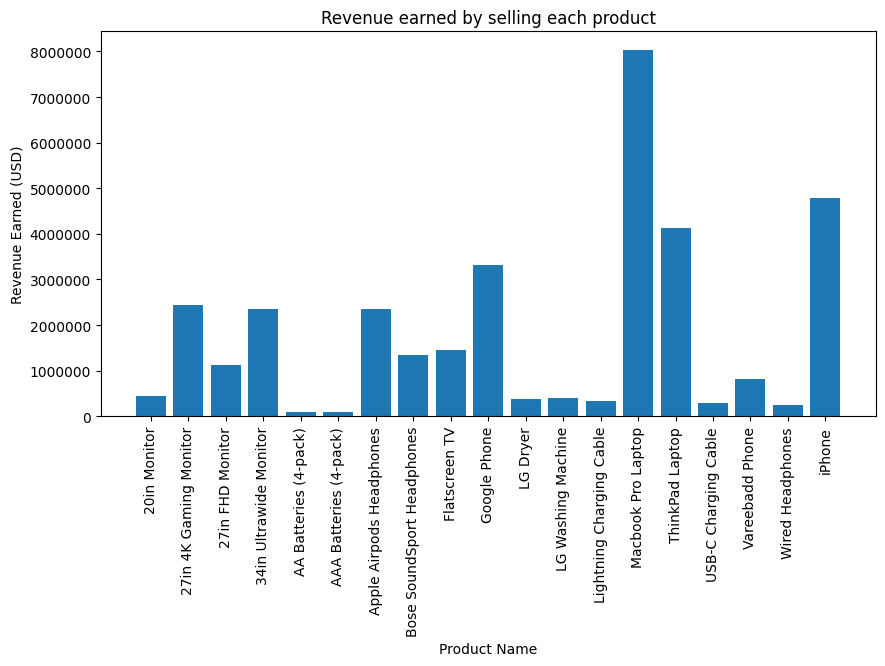

In [32]:
#which product selling yielded more revenue
revenue=all_data.groupby('Product')['Sales'].sum()
plt.figure(figsize=(10,5))
plt.title("Revenue earned by selling each product")
plt.bar(revenue.index,revenue.values)
plt.xticks(revenue.index,rotation="vertical",size=10)
#plt.yticks(revenue.values)
plt.xlabel("Product Name")
plt.ylabel("Revenue Earned (USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

---

## **Step 4: Advanced Insights**
### **4.1 Indepth Analysis of sales**
- Identified why products that sell less in quantity contribute more to overall revenue
- **Observation:** Products like **iPhone , Macbook Pro Laptop** are branded items and are costlier than other products,though bought less in quantity but effectively contributing more in revenue .  

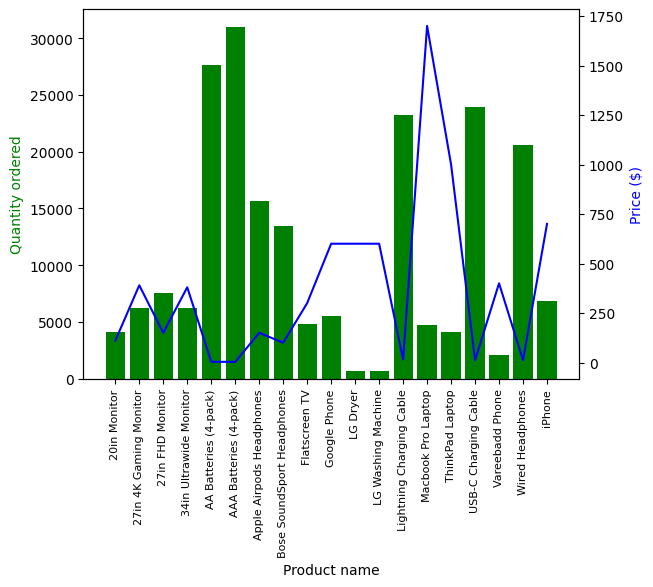

In [33]:

all_data['Price Each']=pd.to_numeric(all_data['Price Each'],errors='coerce')#errors='coerce' will convert any non-numeric values to NaN (so they’re ignored in the mean calculation).
prices=all_data.groupby('Product')['Price Each'].mean()
prod_grp=prod_grp.sort_index()
prices=prices.sort_index()
prices.head()

fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(prod_grp.index,prod_grp.values,color='g')
ax2.plot(prices.index,prices.values,'b')

ax1.set_xticks(range(len(prices.index)))
ax1.set_xticklabels(prices.index,rotation='vertical',size=8)
ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')
plt.show()

---

### **4.2 Price vs Quantity Analysis (Using Regression)**
- Analyzed relationship between product price and quantity sold.  
- **Observation:** Higher-priced products generally sell less, indicating **price sensitivity**.


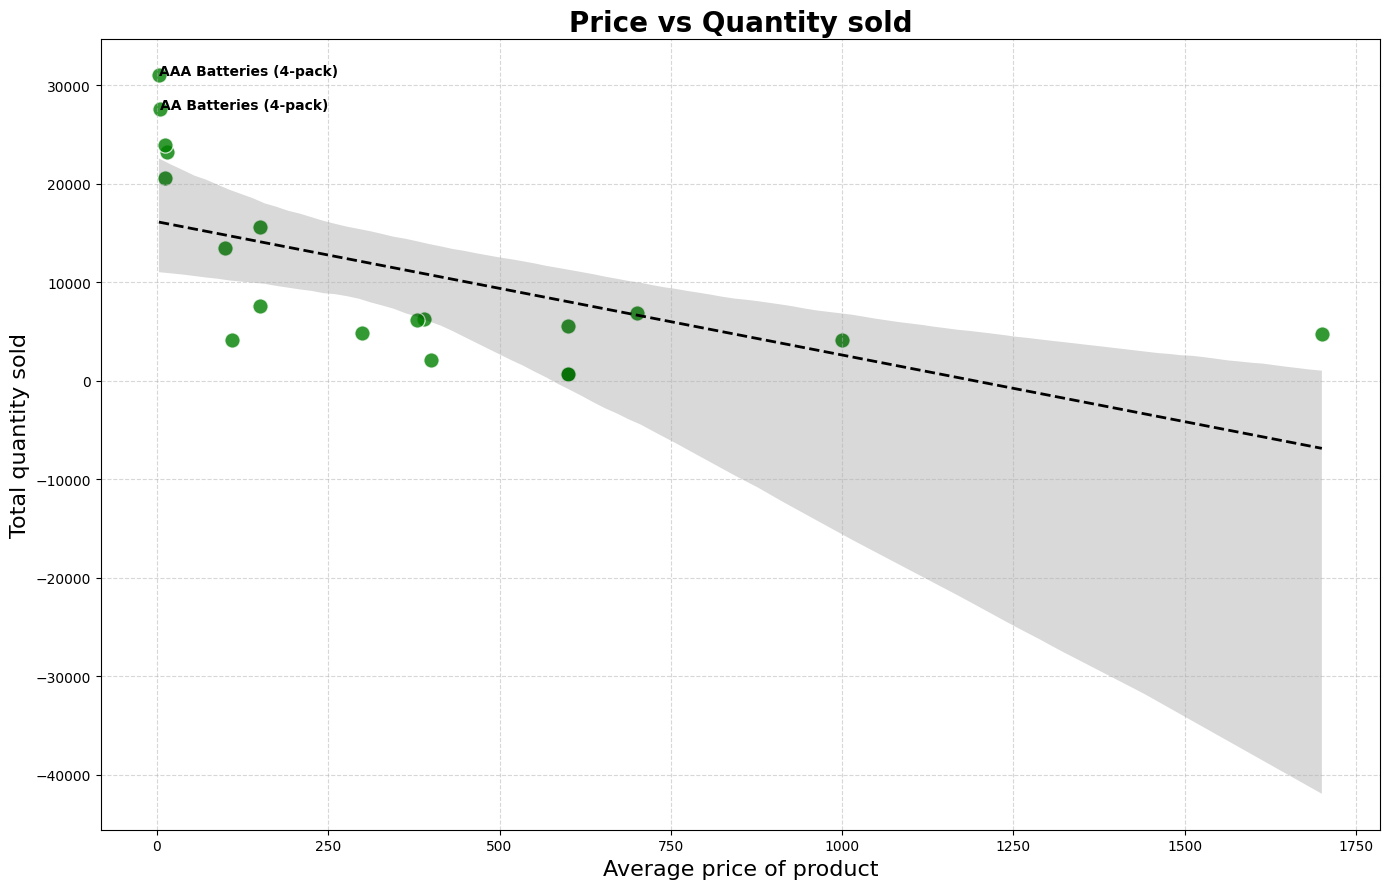

In [34]:
#why do some products sell more?we can visualize this using corelation

import seaborn as sns
import matplotlib.pyplot as plt
all_data.head()
prod_price=all_data.groupby('Product').agg({ 'Price Each' : 'mean','Quantity Ordered':'sum'}).reset_index() #this is a df

plt.figure(figsize=(14,9))
sns.scatterplot(data=prod_price,x='Price Each',y='Quantity Ordered',s=120,color='green',alpha=0.8)

sns.regplot(data=prod_price,x='Price Each',y='Quantity Ordered',scatter=False,color='black',line_kws={'linestyle':'--','linewidth':2})

for i in range(len( prod_price)):
    if prod_price['Quantity Ordered'][i] >  prod_price['Quantity Ordered'].max()*0.8:
        plt.text(
            x= prod_price['Price Each'][i] + 0.2,
            y= prod_price['Quantity Ordered'][i],
            s= prod_price['Product'][i],
            fontsize=10,
            fontweight='bold'
        )
plt.title('Price vs Quantity sold',fontsize=20,fontweight='bold')
plt.xlabel('Average price of product',fontsize=16)
plt.ylabel('Total quantity sold',fontsize=16)
plt.grid(True,linestyle='--',alpha=0.5)
plt.tight_layout()



---

### **4.3 Frequently Bought Together**
- Identified product pairs often bought together (**market basket analysis**).  
- **Observation:** Products like **iPhone + Lightning Cable** are frequently purchased together.  

In [35]:
##what products are most often bought together

from itertools import combinations
from collections import Counter

df=all_data[all_data['Order ID'].duplicated(keep=False)]#we keep all duplicated ,so keep=false(dont keep everything)kep only duplicated part
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
##to drop repeated duplicates
df=df[['Order ID','Grouped']].drop_duplicates()

count=Counter()

for row in df['Grouped']:
    product=row.split(',')
    count.update(Counter(combinations(product,2)))#creates combinationn of products of 2 and uses temporary Counter..if the combinaton appears again, the count gets updated in the actual count()
#count.most_common(10)
for key,value in count.most_common(10):
   print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18664\4097736187.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


---

# **Step 5: Key Insights & Recommendations**
1. **Peak Month:** December → Plan inventory and marketing campaigns ahead of holidays.  
2. **Top Cities:** San Francisco & Los Angeles → Focus marketing and logistics in these regions.  
3. **Peak Purchase Hours:** 7 PM – 11 PM → Optimal time for online promotions.  
4. **Best-Selling Products:** USB-C Cables, AAA Batteries → Maintain stock to meet demand.  
5. **Cross-Sell Opportunities:** iPhone + Lightning Cable → Consider bundle offers.

---

## **Skills Demonstrated**
- **Data Cleaning & Preprocessing**  
- **Feature Engineering**  
- **Exploratory Data Analysis**  
- **Data Visualization** (Bar charts, Line plots, Scatter plots)  
- **Market Basket Analysis**  
- **Python:** Pandas, NumPy, Matplotlib, Seaborn

In [36]:
all_data.to_csv('cleaned_data.csv', index=False)

---